# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv('dados/base_tratada_2.csv', sep = ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_Casa,Tipo_Apartamento
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,False,True
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,True,False
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,False,True
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,False,True
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
22257,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,False,True
22258,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,False,True
22259,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,False,True
22260,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,False,True


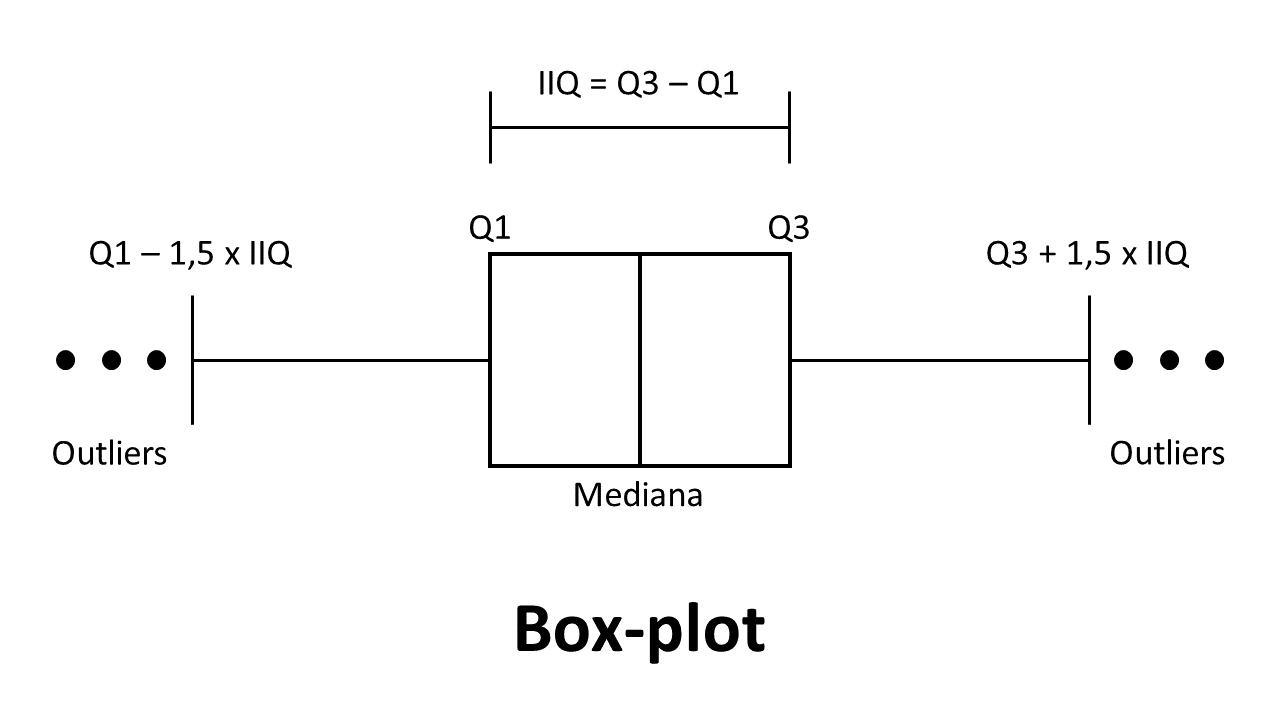

<Axes: >

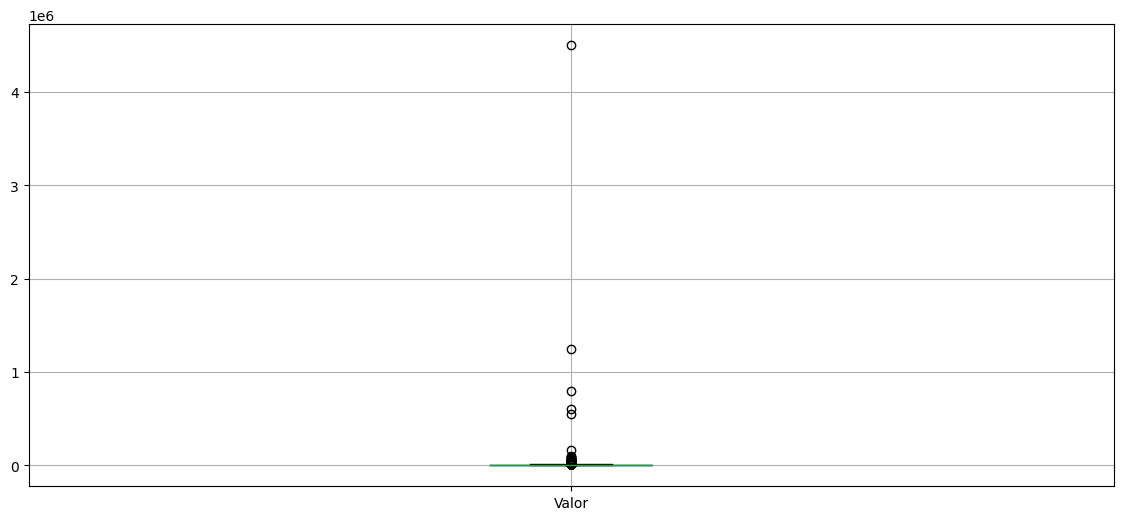

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_Casa,Tipo_Apartamento
7787,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,False,True
10858,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,True,False
12928,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,False,True
14129,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,False,True
15837,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,False,True


In [5]:
valor = dados['Valor']

In [6]:
Q1 = valor.quantile(.25)
Q1

1600.0

In [7]:
Q3 = valor.quantile(.75)
Q3

5500.0

In [8]:
IIQ = Q3 - Q1
IIQ

3900.0

In [9]:
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
[limite_inferior, limite_superior]

[-4250.0, 11350.0]

In [10]:
#Criando um dataframe novo com os dados dentro dos limites, assim removendo os outliers

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
selecao

0        True
1        True
2        True
3        True
4        True
         ... 
22257    True
22258    True
22259    True
22260    True
22261    True
Name: Valor, Length: 22262, dtype: bool

In [11]:
dados_new = dados[selecao]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_Casa,Tipo_Apartamento
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,False,True
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,True,False
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,False,True
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,False,True
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
22257,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,False,True
22258,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,False,True
22259,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,False,True
22260,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,False,True


<Axes: >

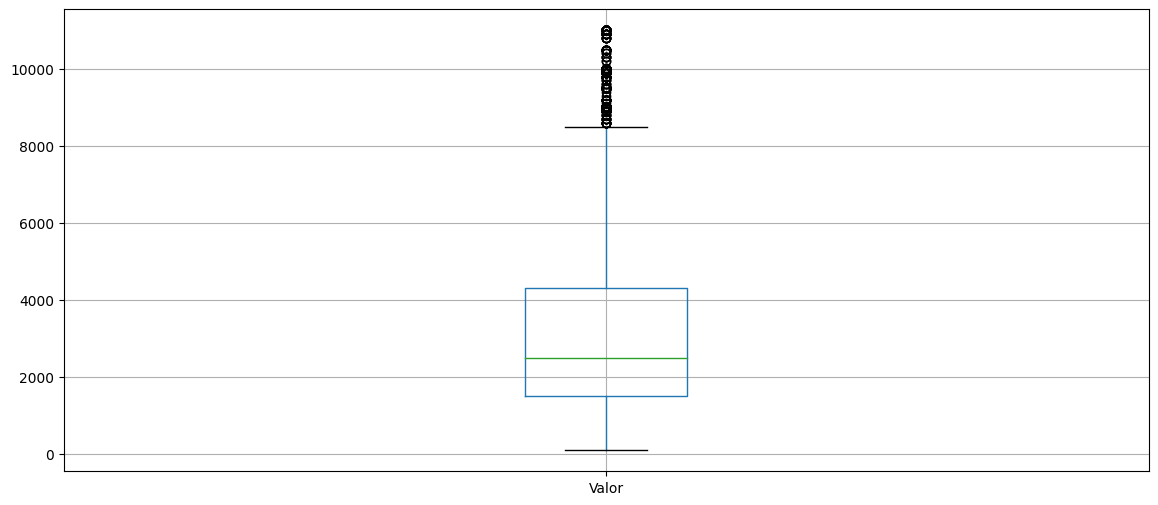

In [12]:
dados_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

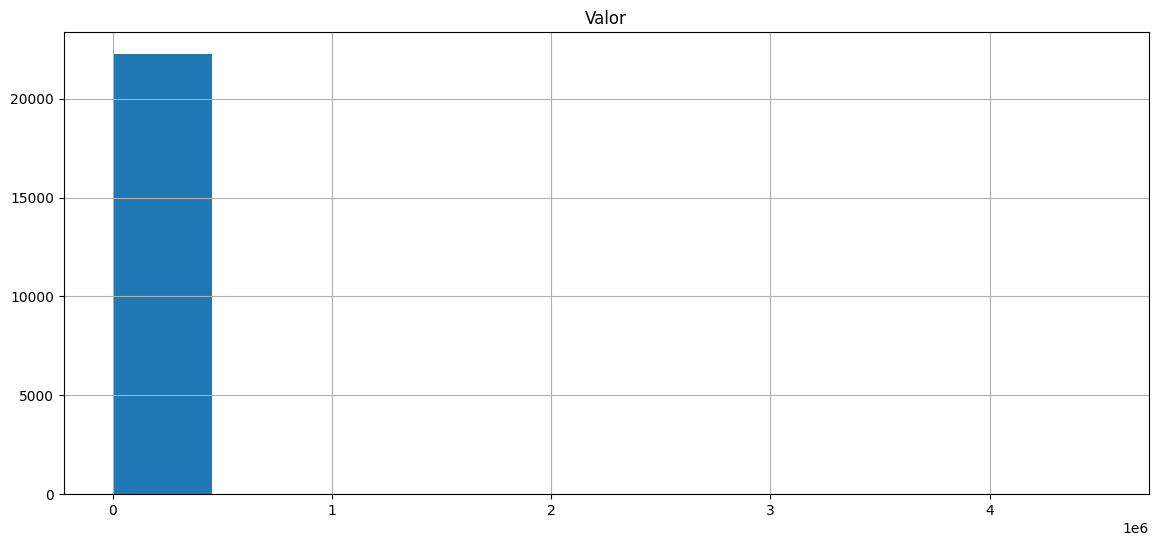

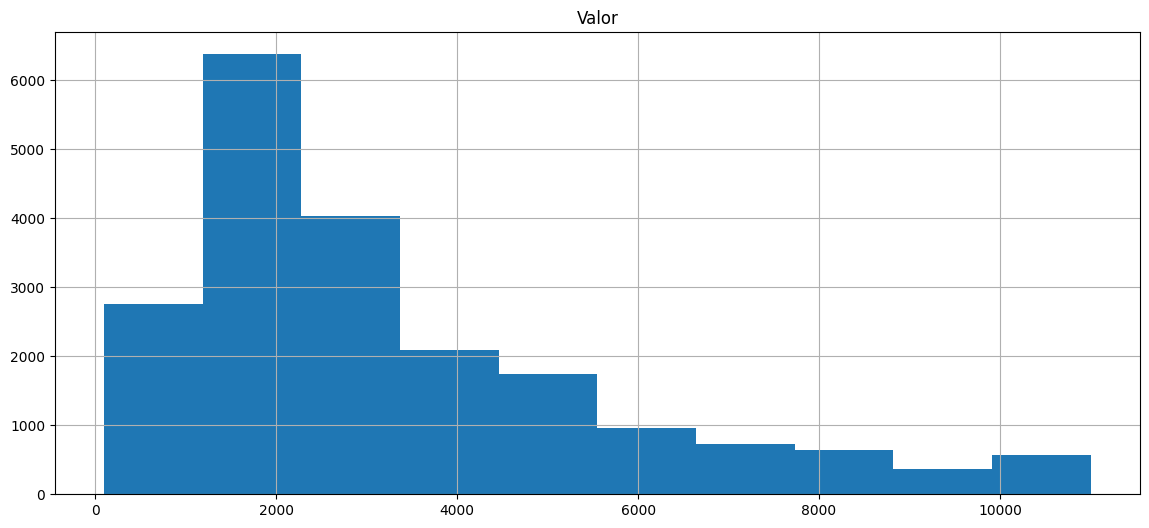

In [13]:
dados.hist(['Valor'])           #Antes e depois da remoção dos outliers
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers por Grupo

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

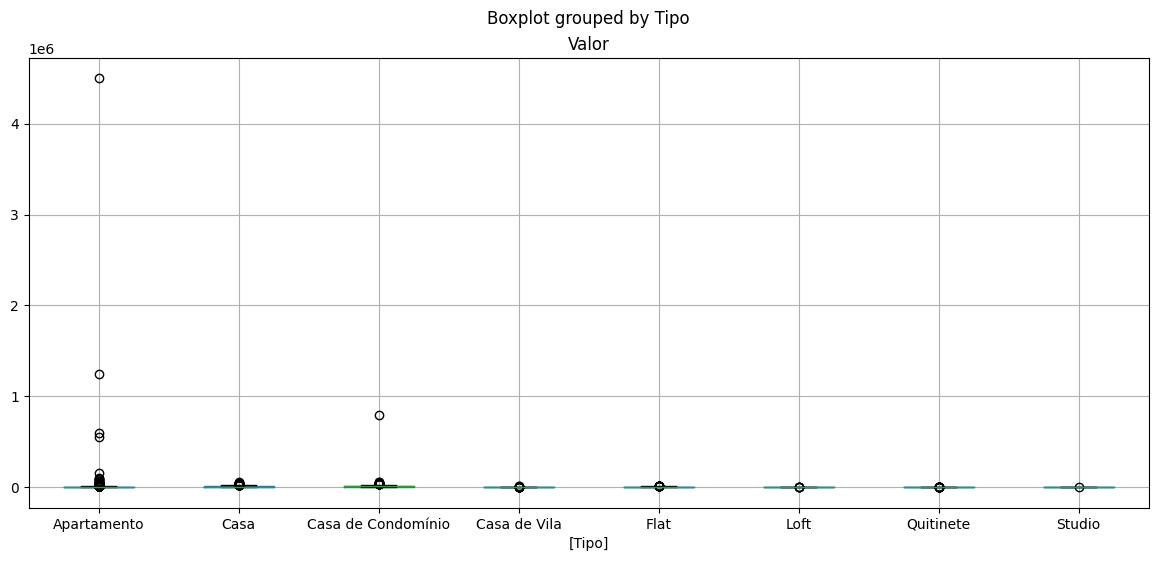

In [15]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [19]:
grupo_tipo = dados.groupby('Tipo')['Valor'] #Cria um grupo separado por Tipo, apenas da variavel Valor
grupo_tipo

In [20]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, ...], 'Casa': [1, 21, 53, 56, 95, 99, 145, 161, 181, 241, 253, 256, 267, 290, 314, 320, 338, 343, 361, 382, 389, 403, 428, 438, 479, 480, 486, 516, 548, 549, 574, 579, 580, 625, 628, 637, 642, 643, 667, 683, 707, 728, 732, 768, 779, 789, 866, 885, 951, 996, 1044, 1052, 1135, 1140, 1142, 1174, 1195, 1268, 1275, 1336, 1354, 1369, 1392, 1435, 1449, 1453, 1463, 1468, 1495, 1498, 1511, 1610, 1629, 1682, 1688, 1692, 1698, 1711, 1737, 1745, 1791, 1841, 1866, 1907, 1937, 1966, 1975, 1993, 2053, 2073, 2090, 2109, 2136, 2142, 2143, 2168, 2206, 2237, 2240, 2247, ...], 'Casa de

In [21]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
[Q1, Q3, IIQ, limite_inferior, limite_superior]

[Tipo
 Apartamento           1700.0
 Casa                  1100.0
 Casa de Condomínio    4250.0
 Casa de Vila           750.0
 Flat                  2500.0
 Loft                  1750.0
 Quitinete              900.0
 Studio                1500.0
 Name: Valor, dtype: float64,
 Tipo
 Apartamento            5000.0
 Casa                   9800.0
 Casa de Condomínio    15000.0
 Casa de Vila           1800.0
 Flat                   6000.0
 Loft                   3000.0
 Quitinete              1500.0
 Studio                 2450.0
 Name: Valor, dtype: float64,
 Tipo
 Apartamento            3300.0
 Casa                   8700.0
 Casa de Condomínio    10750.0
 Casa de Vila           1050.0
 Flat                   3500.0
 Loft                   1250.0
 Quitinete               600.0
 Studio                  950.0
 Name: Valor, dtype: float64,
 Tipo
 Apartamento           -3250.0
 Casa                 -11950.0
 Casa de Condomínio   -11875.0
 Casa de Vila           -825.0
 Flat                  -27

In [22]:
limite_superior['Apartamento']

9950.0

In [23]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Flat
Loft
Quitinete
Studio


In [26]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, ...], 'Casa': [1, 21, 53, 56, 95, 99, 145, 161, 181, 241, 253, 256, 267, 290, 314, 320, 338, 343, 361, 382, 389, 403, 428, 438, 479, 480, 486, 516, 548, 549, 574, 579, 580, 625, 628, 637, 642, 643, 667, 683, 707, 728, 732, 768, 779, 789, 866, 885, 951, 996, 1044, 1052, 1135, 1140, 1142, 1174, 1195, 1268, 1275, 1336, 1354, 1369, 1392, 1435, 1449, 1453, 1463, 1468, 1495, 1498, 1511, 1610, 1629, 1682, 1688, 1692, 1698, 1711, 1737, 1745, 1791, 1841, 1866, 1907, 1937, 1966, 1975, 1993, 2053, 2073, 2090, 2109, 2136, 2142, 2143, 2168, 2206, 2237, 2240, 2247, ...], 'Casa de

In [24]:
dados_group_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_group_new = pd.concat([dados_group_new, dados_selecao])

dados_group_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_Casa,Tipo_Apartamento
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,False,True
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,False,True
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,False,True
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,False,True
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
22251,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,False,True
22258,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,False,True
4662,Studio,Gamboa,0,0,0,110,1500.0,0.0,50.0,13.64,False,True
5518,Studio,Santa Teresa,1,1,0,25,1600.0,600.0,90.0,64.00,False,True


<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

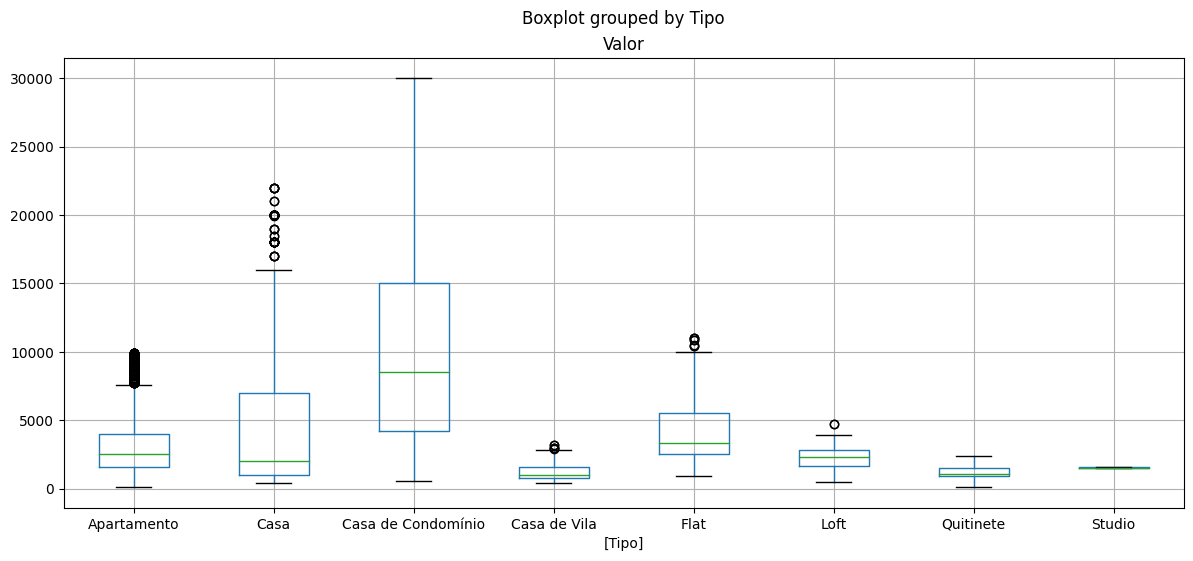

In [25]:
dados_group_new.boxplot(['Valor'], by = ['Tipo'])

In [27]:
dados_group_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_Casa,Tipo_Apartamento
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,False,True
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,False,True
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,False,True
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,False,True
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
22251,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,False,True
22258,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,False,True
4662,Studio,Gamboa,0,0,0,110,1500.0,0.0,50.0,13.64,False,True
5518,Studio,Santa Teresa,1,1,0,25,1600.0,600.0,90.0,64.00,False,True


In [28]:
dados_group_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)